# Single-layer Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
import math
import tensorflow as tf
print(tf.__version__)

%matplotlib inline

1.0.1


## 1. MNIST handwritten digits image set
- Note1: http://yann.lecun.com/exdb/mnist/
- Note2: https://www.tensorflow.org/versions/r0.11/tutorials/mnist/beginners/index.html

In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


- Each image is 28 pixels by 28 pixels. We can interpret this as a big array of numbers:
<img src="https://www.tensorflow.org/versions/r0.11/images/MNIST-Matrix.png" width="50%" />

- flatten 1-D tensor of size 28x28 = 784.
  - Each entry in the tensor is a pixel intensity between 0 and 1, for a particular pixel in a particular image.
$$[0, 0, 0, ..., 0.6, 0.7, 0.7, 0.5, ... 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9, 0.3, ..., 0.4, 0.4, 0.4, ... 0, 0, 0]$$ 

### 1) Training Data

In [3]:
print(type(mnist.train.images), mnist.train.images.shape)
print(type(mnist.train.labels), mnist.train.labels.shape)
print(mnist.train.labels[0])

<class 'numpy.ndarray'> (55000, 784)
<class 'numpy.ndarray'> (55000, 10)
[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]


- Number of train images is 55000.
- **mnist.train.images** is a tensor with a shape of [55000, 784]. 
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-xs.png" width="50%" />

- A one-hot vector is a vector which is 0 in most entries, and 1 in a single entry.
- In this case, the $n$th digit will be represented as a vector which is 1 in the nth entry. 
  - For example, 3 would be $[0,0,0,1,0,0,0,0,0,0]$. 
- **mnist.train.labels** is a tensor with a shape of [55000, 10]. 
<img src="https://www.tensorflow.org/versions/r0.11/images/mnist-train-ys.png" width="48%" />

[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]


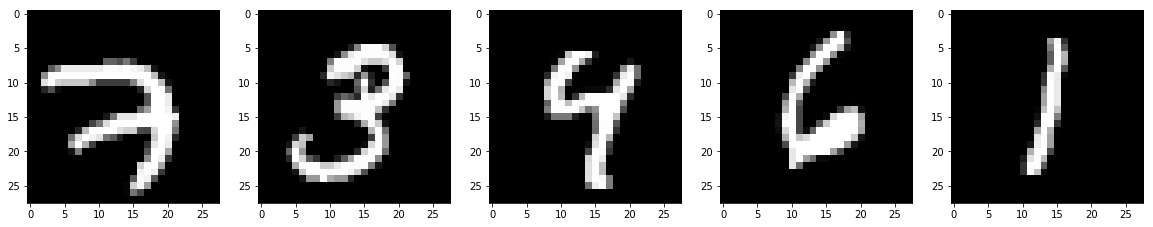

In [4]:
fig = plt.figure(figsize=(20, 5))
for i in range(5):
    img = mnist.train.images[i]
    img.shape = (28, 28)
    plt.subplot(150 + (i+1))
    plt.imshow(img, cmap='gray')
print(mnist.train.labels[1])

### 2) Validation Data

In [5]:
print(type(mnist.validation.images), mnist.validation.images.shape)
print(type(mnist.validation.labels), mnist.validation.labels.shape)
#검증용 데이터

<class 'numpy.ndarray'> (5000, 784)
<class 'numpy.ndarray'> (5000, 10)


### 3) Test Data

In [6]:
print(type(mnist.test.images), mnist.test.images.shape)
print(type(mnist.test.labels), mnist.test.labels.shape)

<class 'numpy.ndarray'> (10000, 784)
<class 'numpy.ndarray'> (10000, 10)


## 2. Simple Neural Network Model (No Hidden Layer)

### 1) Tensor Operation and Shape

- Input Layer to Output Layer
 - $i=1...784$
 - $j=1...10$
$$ u_j = \sum_i W_{ji} x_i + b_j $$

- Presentation of Matrix and Vector
  - Shape of ${\bf W}: (10, 784)$
  - Shape of ${\bf x}: (784, 1)$
  - Shape of ${\bf b}: (10,)$
  - Shape of ${\bf u}: (10,)$
$$ {\bf u} = {\bf Wx + b} $$

-  **Transposed Matrix** Operation in Tensorflow
  - Shape of ${\bf W}: (784, 10)$
  - Shape of ${\bf x}: (1, 784)$
  - Shape of ${\bf b}: (10,)$
  - Shape of ${\bf u}: (10,)$
$$ {\bf u} = {\bf xW + b} $$ 
//텐서플로우에서는 이렇게 쓰더라

- Small Sized Example

In [7]:
W_ = np.array([[1, 2, 3], [4, 5, 6]])  #shape of W: (2, 3)
x_ = np.array([[1, 2]])                #shape of x: (1, 2)
xW_ = np.dot(x_, W_)                     #shape of xW: (1, 3)
print(W_.shape, x_.shape, xW_.shape)
print(xW_)

print()

b_ = np.array([10, 20, 30])            #shape of b: (3,)
u_ = xW_ + b_                            #shape of u: (1, 3) 
print(b_.shape, u_.shape)
print(u_)

(2, 3) (1, 2) (1, 3)
[[ 9 12 15]]

(3,) (1, 3)
[[19 32 45]]


### 2) Mini Batch

In [8]:
#batch_images, batch_labels = mnist.train.next_batch(100)
#print(batch_images.shape)
#print batch_images
#print

#print(batch_labels.shape)
#print batch_labels

- Mini Batch (ex. batch size = 100)  
  - Shape of ${\bf W}: (784, 10)$
  - Shape of ${\bf x}: (100, 784)$
  - Shape of ${\bf b}: (10,)$
  - Shape of ${\bf u}: (100, 10)$
$$ {\bf U} = {\bf XW + B} $$  

- Small Sized Example

In [9]:
W_ = np.array([[1, 2, 3], [4, 5, 6]])                    #shape of W: (2, 3)
x_ = np.array([[1, 2], [1, 2], [1, 2], [1, 2], [1, 2]])  #shape of x: (5, 2)
xW_ = np.dot(x_, W_)                                       #shape of xW: (5, 3)
print(W_.shape, x_.shape, xW_.shape)
print(xW_)

print()

b_ = np.array([10, 20, 30])            #shape of b: (3,)
u_ = xW_ + b_                            #shape of u: (1, 3) 
print(b_.shape, u_.shape)
print(u_)

(2, 3) (5, 2) (5, 3)
[[ 9 12 15]
 [ 9 12 15]
 [ 9 12 15]
 [ 9 12 15]
 [ 9 12 15]]

(3,) (5, 3)
[[19 32 45]
 [19 32 45]
 [19 32 45]
 [19 32 45]
 [19 32 45]]


### 3) Model Construction

- 여기서부터가 텐서플로우
- The placeholder to store the training data:

In [16]:
#일단 장소만 만들자
x = tf.placeholder(tf.float32, [None, 784])
print("x -", x.get_shape())

x - (?, 784)


- The placeholder to store the correct answers (ground truth):

In [18]:
y_target = tf.placeholder(tf.float32, [None, 10])
print("y -", y_target.get_shape())

y - (?, 10)


- A single (output) layer neural network model

In [12]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
print("W -", W.get_shape())
print("b -", b.get_shape())

W - (784, 10)
b - (10,)


In [20]:
# 배치 연산을 위해 x와 W를 바꿨어 여기서 매트릭스 순서가 중요해
u = tf.matmul(x, W) + b
print("u -", u.get_shape())

u - (?, 10)


### 4) Target Setup

- softmax

$$ {\bf z} = softmax({\bf u}) $$

- Error functions: Cross entropy

- Suppose you have two tensors, where $u$ contains computed scores for each class (for example, from $u = W*x + b$) and $y_target$ contains one-hot encoded true labels.

<pre>
u  = ... # Predicted label, e.g. $u = tf.matmul(X, W) + b
y_target  = ... # True label, one-hot encoded
</pre>

- We call $u$ **logits** (if you interpret the scores in u as unnormalized log probabilities).

- Additionally, the total cross-entropy loss computed in this manner:

<pre>
z = tf.nn.softmax(u)
total_loss = tf.reduce_mean(-tf.reduce_sum(y_target * tf.log(z), [1]))
//Cross Entropy 구하는거
</pre>

- is essentially equivalent to the total cross-entropy loss computed with the function <i>softmax_cross_entropy_with_logits()</i>:

<pre>
total_loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u, labels=y_target))
</pre>

In [23]:
learning_rate = 0.05
error = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=u, labels=y_target))
#위에 있는 것은 softmax도 해주고 cross entropy도 해주는 tensorflow 함수임
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(error)
#복잡했던 미분을 위의 함수로 간단히 객체를 생성하여 사용

## 4. Training & Evaluation

Total batch: 550
Epoch:  0, Train Error: 2.30271, Validation Error: 2.30257, Test Accuracy: 0.09800
Epoch:  1, Train Error: 0.45297, Validation Error: 0.43186, Test Accuracy: 0.89230
Epoch:  2, Train Error: 0.38805, Validation Error: 0.36626, Test Accuracy: 0.90150
Epoch:  3, Train Error: 0.36054, Validation Error: 0.33977, Test Accuracy: 0.90820
Epoch:  4, Train Error: 0.34424, Validation Error: 0.32524, Test Accuracy: 0.91110
Epoch:  5, Train Error: 0.33274, Validation Error: 0.31389, Test Accuracy: 0.91320
Epoch:  6, Train Error: 0.32406, Validation Error: 0.30651, Test Accuracy: 0.91410
Epoch:  7, Train Error: 0.31786, Validation Error: 0.30074, Test Accuracy: 0.91700
Epoch:  8, Train Error: 0.31210, Validation Error: 0.29600, Test Accuracy: 0.91830
Epoch:  9, Train Error: 0.30814, Validation Error: 0.29250, Test Accuracy: 0.91730
Epoch: 10, Train Error: 0.30429, Validation Error: 0.28997, Test Accuracy: 0.91880
Epoch: 11, Train Error: 0.30077, Validation Error: 0.28622, Test Accur

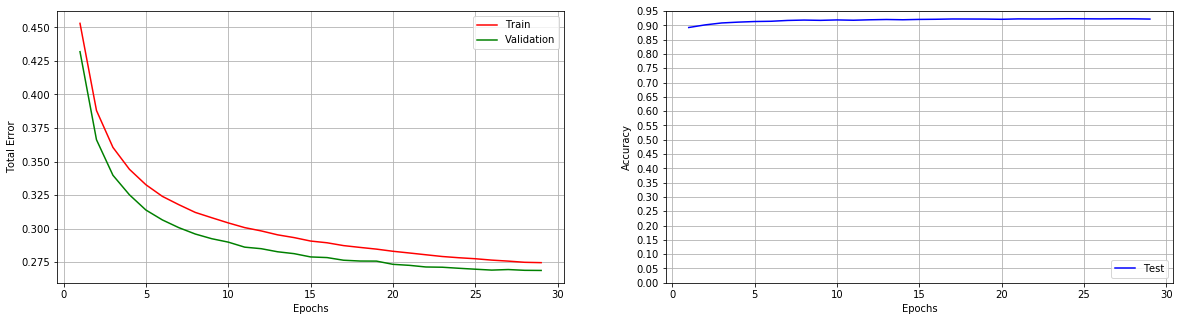

[7 2 1 ..., 4 5 6]
[7 2 1 ..., 4 5 6]
Number of False Prediction: 780
False Prediction Index: 8, Prediction: 6, Ground Truth: 5
False Prediction Index: 33, Prediction: 6, Ground Truth: 4
False Prediction Index: 63, Prediction: 2, Ground Truth: 3
False Prediction Index: 66, Prediction: 7, Ground Truth: 6
False Prediction Index: 77, Prediction: 7, Ground Truth: 2


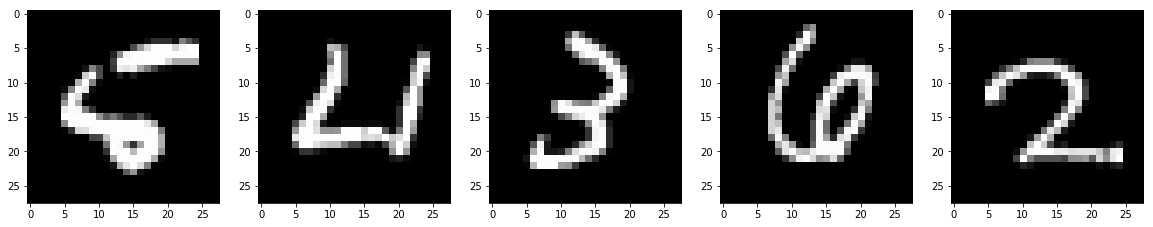

In [25]:
prediction_and_ground_truth = tf.equal(tf.argmax(u, 1), tf.argmax(y_target, 1))
#                                                  ---2번째col
#                                             u = (?, 10)인데 10개가 있는 col 
accuracy = tf.reduce_mean(tf.cast(prediction_and_ground_truth, tf.float32)) #다 더하고 평균값

def draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list):
    # Draw Error Values and Accuracy
    fig = plt.figure(figsize=(20, 5))
    plt.subplot(121)
    plt.plot(epoch_list[1:], train_error_list[1:], 'r', label='Train')
    plt.plot(epoch_list[1:], validation_error_list[1:], 'g', label='Validation')
    plt.ylabel('Total Error')
    plt.xlabel('Epochs')
    plt.grid(True)
    plt.legend(loc='upper right')

    plt.subplot(122)
    plt.plot(epoch_list[1:], test_accuracy_list[1:], 'b', label='Test')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.yticks(np.arange(0.0, 1.0, 0.05))
    plt.grid(True)
    plt.legend(loc='lower right')
    plt.show()
    
def draw_false_prediction(diff_index_list):  #False나온 것만 이미지 출력
    fig = plt.figure(figsize=(20, 5))
    for i in range(5):
        j = diff_index_list[i]
        print("False Prediction Index: %s, Prediction: %s, Ground Truth: %s" % (j, prediction[j], ground_truth[j]))
        img = np.array(mnist.test.images[j])
        img.shape = (28, 28)
        plt.subplot(150 + (i+1))
        plt.imshow(img, cmap='gray')

#학습 시작
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    batch_size = 100
    total_batch = int(math.ceil(mnist.train.num_examples/float(batch_size)))
    # math.ceil -> 소수점 올림   math.floor ->소수점 내림
    print("Total batch: %d" % total_batch)    

    training_epochs = 30
    epoch_list = []
    train_error_list = []
    validation_error_list = []
    test_accuracy_list = []
    for epoch in range(training_epochs):
        epoch_list.append(epoch)
        # Train Error Value
        train_error_value = sess.run(error, feed_dict={x: mnist.train.images, y_target: mnist.train.labels})
          #아직 학습 시키지 않았지만 0들어가 있는 매트릭스에 대해 총 에러
        train_error_list.append(train_error_value)
        
        validation_error_value = sess.run(error, feed_dict={x: mnist.validation.images, y_target: mnist.validation.labels})
        validation_error_list.append(validation_error_value)
        
        test_accuracy_value = sess.run(accuracy, feed_dict={x: mnist.test.images, y_target: mnist.test.labels})
        test_accuracy_list.append(test_accuracy_value) #10,000개에 대한 테스트이미지
        print("Epoch: {0:2d}, Train Error: {1:0.5f}, Validation Error: {2:0.5f}, Test Accuracy: {3:0.5f}".format(epoch, train_error_value, validation_error_value, test_accuracy_value))
        
        
        #여기가 트레이닝
        for i in range(total_batch):
            batch_images, batch_labels = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={x: batch_images, y_target: batch_labels})
                    #----------
                    #Gradient Optimizer
    

    # Draw Graph about Error Values & Accuracy Values
    draw_error_values_and_accuracy(epoch_list, train_error_list, validation_error_list, test_accuracy_list)
    
    # False Prediction Profile
    prediction = sess.run(tf.argmax(u, 1), feed_dict={x:mnist.test.images})
    ground_truth = sess.run(tf.argmax(y_target, 1), feed_dict={y_target:mnist.test.labels})

    print(prediction)
    print(ground_truth)

    diff_index_list = []
    for i in range(mnist.test.num_examples):
        if (prediction[i] != ground_truth[i]):
            diff_index_list.append(i)
            
    print("Number of False Prediction:", len(diff_index_list))
    draw_false_prediction(diff_index_list)